In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sympy as sp
import pyPI as pi

In [2]:
# Laser
E = 2189.40 * np.array([[1], [1]]) # V/m -> 10mW y 1mm diametro

# Beamsplitter
BS = 1/np.sqrt(2) * np.array([[1, 1], 
                                [1, -1]])

E_in = BS @ E

print(np.abs(E_in[0,0]))
print(np.abs(E_in[1,0]))
print(np.angle(E_in[1,0]))

3096.279173459654
0.0
0.0


In [3]:
# Campo incidente en la muestra
# E = HWP*QWP*E_in
Eis = pi.jones_matrix(np.pi/2, np.pi/8) @ (pi.jones_matrix(np.pi, np.pi) @ E_in)
print(np.abs(Eis[0,0]))
print(np.abs(Eis[1,0]))
print(np.angle(Eis[1,0])/np.pi)

2681.4564214247443
1548.1395867298274
0.25000000000000017


In [4]:
# Campo a la salida en la muestra
# E = HWP*QWP*E_in
Es = pi.jones_matrix(np.pi/2, 0) @ Eis
print(np.abs(Es[0,0]))
print(np.abs(Es[1,0]))
print(np.angle(Es[1,0])/np.pi)

2681.4564214247443
1548.1395867298274
-0.2499999999999999


In [5]:
# Brazo de referencia E ~ H
# E = HWP*QWP*E_in
Er_1 = pi.jones_matrix(np.pi/2, 0) @ (pi.jones_matrix(np.pi, 0) @ E_in)
print(np.abs(Er_1[0,0]))
print(np.abs(Er_1[1,0]))
print(np.angle(Er_1[1,0])/np.pi)


3096.279173459654
0.0
0.0


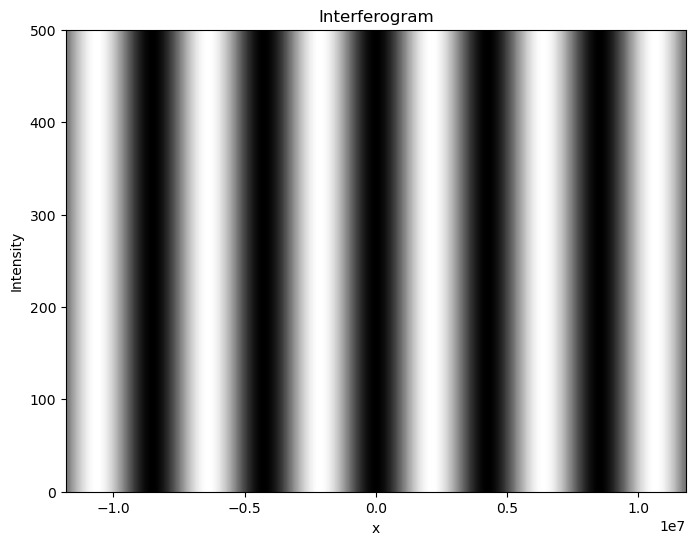

In [6]:
# Primer interferograma
info_1, i_1 = pi.I(Er_1, Es, plot=True)

In [7]:
# Brazo de referencia E ~ +45
Er_2 = pi.jones_matrix(np.pi/2, np.pi/2) @ (pi.jones_matrix(np.pi, np.pi/8) @ E_in)
print(np.abs(Er_2[0,0]))
print(np.abs(Er_2[1,0]))
print(np.angle(Er_2[1,0])/np.pi)


2189.3999999999996
2189.4
3.898171832519375e-17


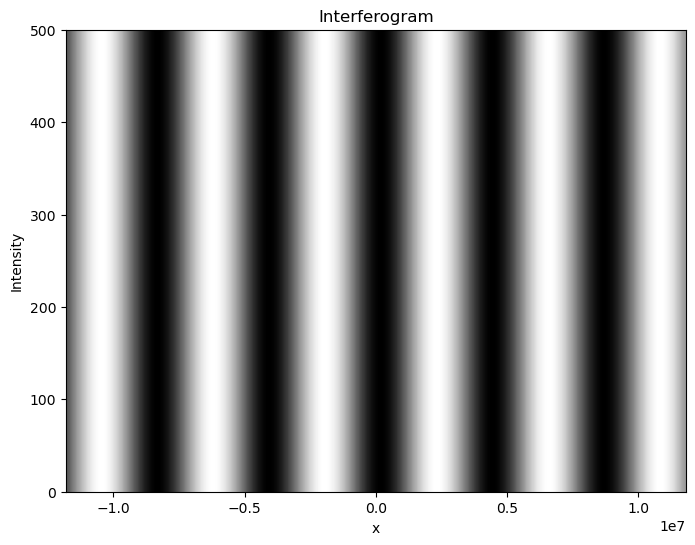

In [8]:
# Segundo interferograma
info_2, i_2 = pi.I(Er_2, Es, plot=True)

In [13]:
# Recosntruccion de campo a la salida de la muestra
pi.Es_parameters(Er_1, Er_2, info_1, info_2, p = True)
print(np.abs(Es[0,0]))
print(np.abs(Es[1,0]))
print(np.angle(Es[1,0])/np.pi)

Calculated Parameters:
Esx: 2681.4564214247443
Esy: 1548.1395867298284
Delta_phi_s: (-0.04492470176282402+0.07680631248305878j)π
2681.4564214247443
1548.1395867298274
-0.2499999999999999
